# Import Necessary Libraries

In [8]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler

# Import the Dataset

In [9]:
dataset = pd.read_csv("Live.csv")
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


# Dropping Unnecessary Columns

In [10]:
dataset=dataset.drop(columns=['Column1','Column2','Column3','Column4'])
dataset.dropna(inplace=True)
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0


# Categorical and Numerical Features Present

In [11]:
categorical_features = dataset.select_dtypes(include = ['object']).columns.tolist()
numerical_features = dataset.select_dtypes(exclude=['object']).columns.tolist()
print("Categorical features: ",categorical_features)
print("Numerical features: ",numerical_features)

Categorical features:  ['status_id', 'status_type', 'status_published']
Numerical features:  ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']


# Missing Value Imputation

In [12]:
imputer=SimpleImputer(strategy='mean')
dataset[numerical_features]=imputer.fit_transform(dataset[numerical_features])
dataset.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,0.0
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227.0,236.0,57.0,204.0,21.0,1.0,1.0,0.0,0.0
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0


# Converting Date Column to DateTime
It is done so that we can work on this column numerically

In [13]:
# Convert 'status_published' column to datetime
dataset['status_published'] = pd.to_datetime(dataset['status_published'])

# Convert datetime to Unix timestamp (seconds)
dataset['status_published'] = dataset['status_published'].astype('int64') // 10**9

# Encoding Categorical Values using Label Encoder

In [14]:
label_encoder = LabelEncoder()
dataset = pd.get_dummies(dataset, columns=['status_type']).replace(False, 0).replace(True, 1)
dataset['status_id'] = label_encoder.fit_transform(dataset['status_id'])

dataset.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,2831,1524376800,529.0,512.0,262.0,432.0,92.0,3.0,1.0,1.0,0.0,0,0,0,1
1,2830,1524350700,150.0,0.0,0.0,150.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
2,2829,1524291420,227.0,236.0,57.0,204.0,21.0,1.0,1.0,0.0,0.0,0,0,0,1
3,2828,1524277740,111.0,0.0,0.0,111.0,0.0,0.0,0.0,0.0,0.0,0,1,0,0
4,2827,1524021720,213.0,0.0,0.0,204.0,9.0,0.0,0.0,0.0,0.0,0,1,0,0


# Min Max Scaling

In [15]:
scaler = MinMaxScaler()

dataset[dataset.columns] = scaler.fit_transform(dataset[dataset.columns])

dataset.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.404660,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.404517,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.404374,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.404231,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.404088,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


# Dropping Columns with Unique Values and NaN Values

In [16]:
columns_to_drop = []
for column in dataset.columns:
    if dataset[column].nunique() == len(dataset):
        columns_to_drop.append(column)

dataset.drop(columns=columns_to_drop, inplace=True)
dataset.dropna(inplace=True)

dataset.head()

,status_id,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,status_type_link,status_type_photo,status_type_status,status_type_video
0,0.404660,0.976007,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0.0,0.0,0.0,1.0
1,0.404517,0.975867,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
2,0.404374,0.975549,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.404231,0.975476,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0
4,0.404088,0.974103,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,0.0,1.0,0.0,0.0


# Normalization using StandardScaler

In [17]:
X = dataset[dataset.columns]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(X_scaled)

[[-0.33961232  0.74841551  0.64610394 ... -1.24599285 -0.23366611
   1.42146599]
 [-0.3401053   0.74797908 -0.17319166 ...  0.80257282 -0.23366611
  -0.70349907]
 [-0.34059827  0.74698784 -0.00673846 ... -1.24599285 -0.23366611
   1.42146599]
 ...
 [-1.73424072 -0.08561106 -0.49312768 ...  0.80257282 -0.23366611
  -0.70349907]
 [-1.73473369 -0.08840019  0.26131603 ...  0.80257282 -0.23366611
  -0.70349907]
 [-1.73522667 -0.10225855 -0.46070173 ...  0.80257282 -0.23366611
  -0.70349907]]


# Using the elbow method to find the optimal number of clusters

c:\Users\Arun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Arun\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Arun\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\Arun\AppData\Local\Programs\Python\Pytho

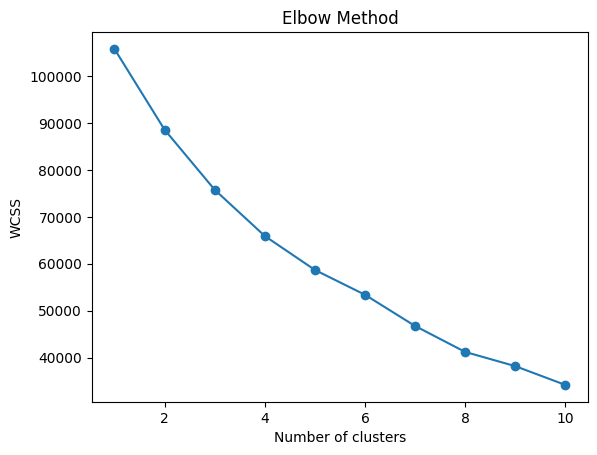

In [18]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method graph
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Hierarchical Clustering

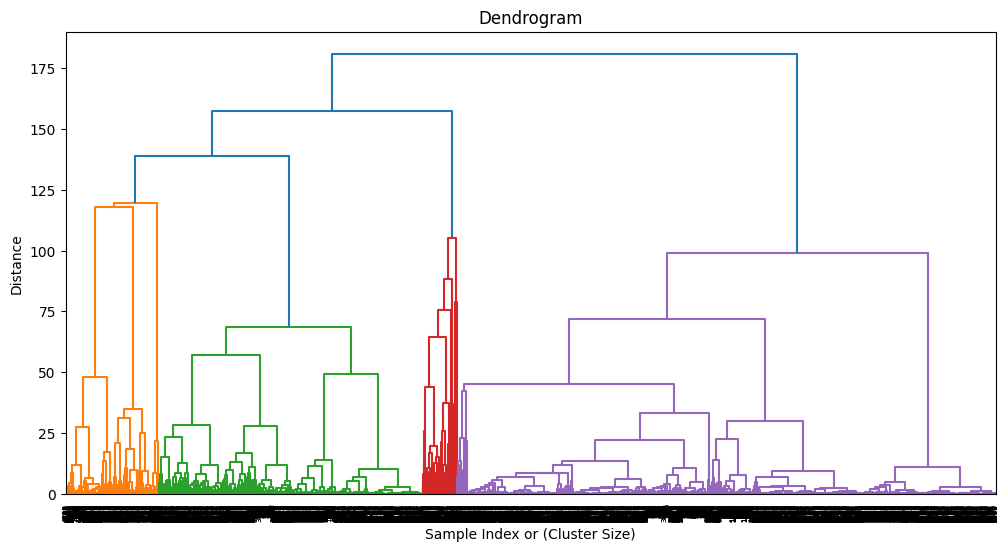

In [19]:
# Perform hierarchical clustering
linked = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

# Finding the Optimal number of Clusters Based on the Elbow Method

In [20]:
last_merges = linked[-10:, 2]  # Taking the last 10 merges
deltas = last_merges[:-1] - last_merges[1:]  # Calculating the delta distances
k = deltas.argmax() + 2  # The optimal number of clusters is where the delta is maximum
print("Optimal number of clusters based on the elbow method:", k)

Optimal number of clusters based on the elbow method: 7


# Visualizing the Found Clusters for 'k-means'

In [21]:
kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_scaled)

c:\Users\Arun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


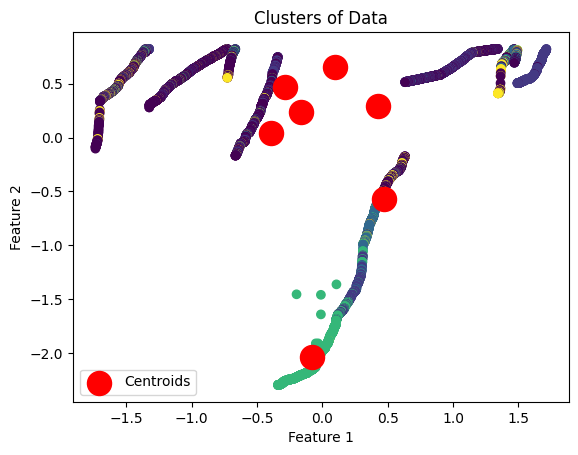

In [22]:
# Visualizing the clusters
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans.labels_, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label='Centroids')
plt.title('Clusters of Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

# Visualizing the Found Clusters for 'Hierarchical Clustering'


In [23]:
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
y_hc = hc.fit_predict(X_scaled)

c:\Users\Arun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


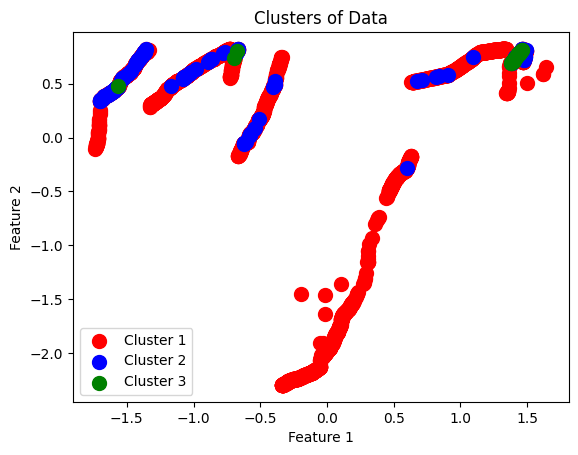

In [24]:
# Visualizing the clusters
plt.scatter(X_scaled[y_hc == 0, 0], X_scaled[y_hc == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_hc == 1, 0], X_scaled[y_hc == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_hc == 2, 0], X_scaled[y_hc == 2, 1], s=100, c='green', label='Cluster 3')
# Add more scatter plots if you have more clusters
plt.title('Clusters of Data')
plt.xlabel('Feature 1')  # Replace with appropriate feature name
plt.ylabel('Feature 2')  # Replace with appropriate feature name
plt.legend()
plt.show()

# Majority Status for 'k-means'

In [25]:
# Assigning cluster labels to original dataset
dataset['cluster_label'] = kmeans.labels_

# Identify the majority status_type of each cluster
cluster_majority_status_type_kmeans = dataset.groupby('cluster_label')[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']].sum().idxmax(axis=1)

print("Majority status_type of each cluster for K-means method:")
print(cluster_majority_status_type_kmeans)

Majority status_type of each cluster for K-means method:
cluster_label
0     status_type_photo
1     status_type_video
2     status_type_photo
3     status_type_video
4     status_type_photo
5      status_type_link
6    status_type_status
dtype: object


# Majority Status for 'Hierarchical Clustering'

In [26]:
# Assigning cluster labels to original dataset
dataset['cluster_label'] = y_hc

# Identify the majority status_type of each cluster
cluster_majority_status_type_hierarchical = dataset.groupby('cluster_label')[['status_type_link', 'status_type_photo', 'status_type_status', 'status_type_video']].sum().idxmax(axis=1)

print("\nMajority status_type of each cluster for Hierarchical method:")
print(cluster_majority_status_type_hierarchical)


Majority status_type of each cluster for Hierarchical method:
cluster_label
0     status_type_photo
1     status_type_video
2     status_type_video
3     status_type_video
4      status_type_link
5     status_type_photo
6    status_type_status
dtype: object
